In [2]:
from classes.basic_optical_gating import BasicOpticalGating as BOG

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

In [31]:
sequence = "D:/Data/Edinburgh_data_May_2023/seq.tif"
reference_sequence = "D:/Data/Edinburgh_data_May_2023/ref_seq.tif"
reference_sequence_period = 2.835414623487623942e+01

sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"


og = BOG()
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 1107 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 40 frames
BOG i Setting reference period to 35.77851226661945
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.


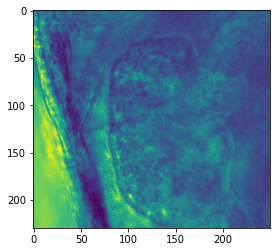

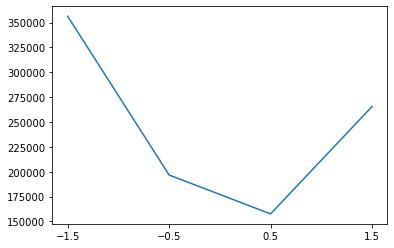

(-0.31877642400525474, 123055.5)


In [120]:
plt.imshow(og.sequence[32])
plt.show()

def v_fitting_standard(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)

    return x, y

frames_to_compare = [94, 96, 98, 100]
frame = 97

frames_to_save = []
for f in frames_to_compare:
    frames_to_save.append(og.sequence[97].astype(np.int32) - og.sequence[f].astype(np.int32))

frames_to_save = np.array(frames_to_save)
tf.imwrite("comparison.tif", frames_to_save)

SAD = []
for i in frames_to_compare:
    SAD.append(np.sum(np.abs(og.sequence[97].astype(np.int32) - og.sequence[i].astype(np.int32))))

plt.plot(np.linspace(-1.5, 1.5, 4), SAD)
plt.xticks(np.linspace(-1.5, 1.5, 4))
plt.show()

y_1 = SAD[1]
y_2 = SAD[2]
y_3 = SAD[3]
print(v_fitting_standard(y_1, y_2, y_3))


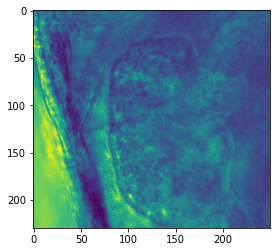

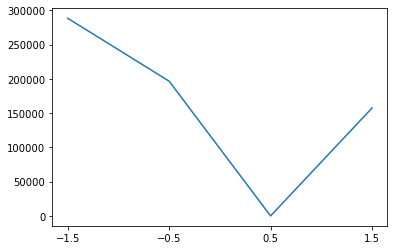

(0.09959276225145025, -19589.0)


In [122]:
plt.imshow(og.sequence[32])
plt.show()

def v_fitting_standard(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)

    return x, y

frames_to_compare = [95, 96, 97, 98]
frame = 97

frames_to_save = []
for f in frames_to_compare:
    frames_to_save.append(og.sequence[97].astype(np.int32) - og.sequence[f].astype(np.int32))

frames_to_save = np.array(frames_to_save)
tf.imwrite("comparison.tif", frames_to_save)

SAD = []
for i in frames_to_compare:
    SAD.append(np.sum(np.abs(og.sequence[97].astype(np.int32) - og.sequence[i].astype(np.int32))))

plt.plot(np.linspace(-1.5, 1.5, 4), SAD)
plt.xticks(np.linspace(-1.5, 1.5, 4))
plt.show()

y_1 = SAD[1]
y_2 = SAD[2]
y_3 = SAD[3]
print(v_fitting_standard(y_1, y_2, y_3))


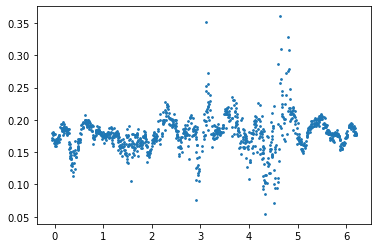

(array([  97,  106,  247,  281,  388, 1021, 1057, 1092], dtype=int64),)


In [32]:
plt.scatter(og.phases[1::], og.delta_phases, s = 3)
plt.show()

print(np.where(og.delta_phases < 0.1))

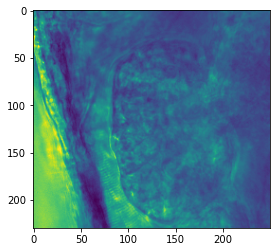

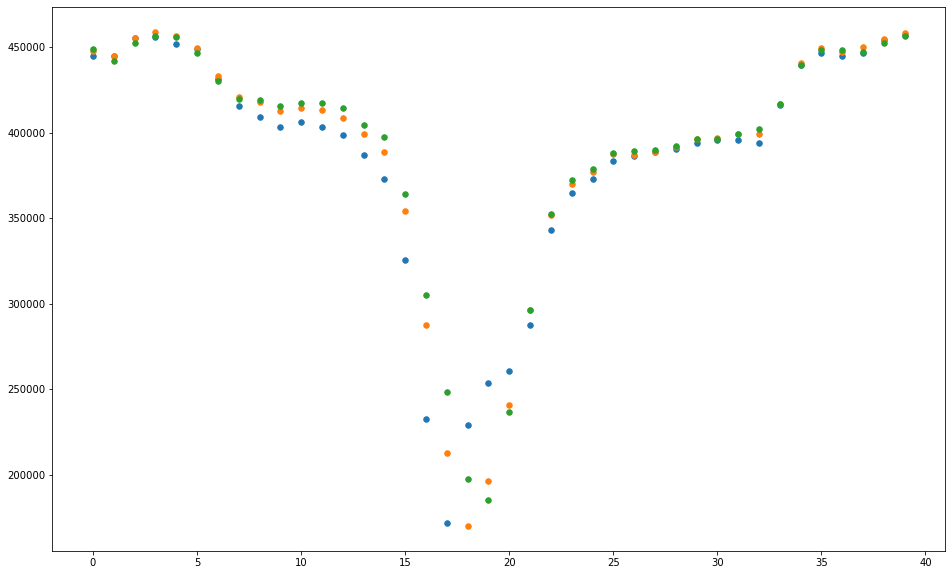

In [37]:
plt.imshow(og.sequence[97])
plt.show()

plt.figure(figsize = (16,10))
plt.scatter(range(og.sads[0].shape[0]), og.sads[96], s = 30)
plt.scatter(range(og.sads[0].shape[0]), og.sads[97], s = 30)
plt.scatter(range(og.sads[0].shape[0]), og.sads[98], s = 30)
plt.show()

In [98]:
frame = 97

minima = np.argmin(og.sads[97])
print(minima)

frames = []
for i in range(og.reference_sequence.shape[0]):
    frames.append(np.abs(og.sequence[frame].astype(np.int16) - og.reference_sequence[i].astype(np.int16)))

frames = np.array(frames)
tf.imwrite("test.tif", frames)

18


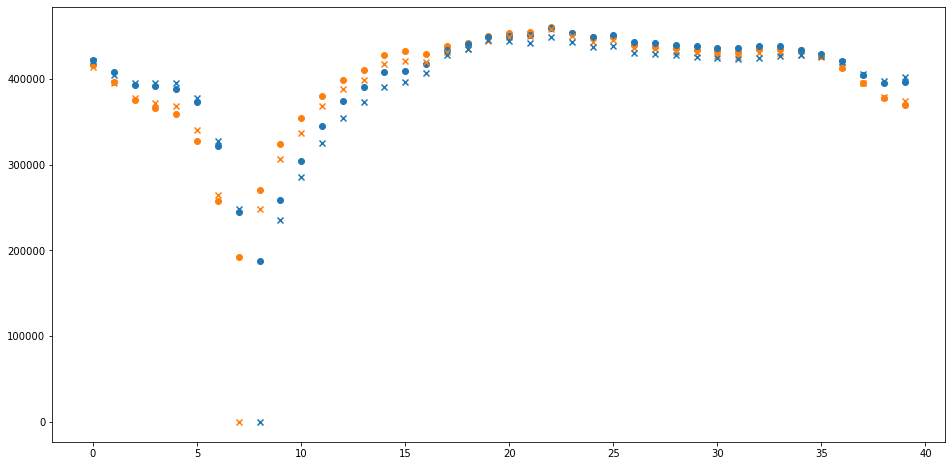

In [51]:
plt.figure(figsize = (16,8))
plt.scatter(range(og.sads[86].shape[0]), og.sads[86], c = "tab:orange")
plt.scatter(range(og.sads[86].shape[0]), og.sads[87], c = "tab:blue")

ref_sads = []
for i in range(og.reference_sequence.shape[0]):
    ref_sad = []
    for j in range(og.reference_sequence.shape[0]):
        ref_sad.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int32) - og.reference_sequence[j].astype(np.int32))))
    ref_sads.append(ref_sad)
ref_sads = np.array(ref_sads)

plt.scatter(range(ref_sads[7].shape[0]), ref_sads[7], c = "tab:orange", marker = "x")
plt.scatter(range(ref_sads[7].shape[0]), ref_sads[8], c = "tab:blue", marker = "x")
plt.show()

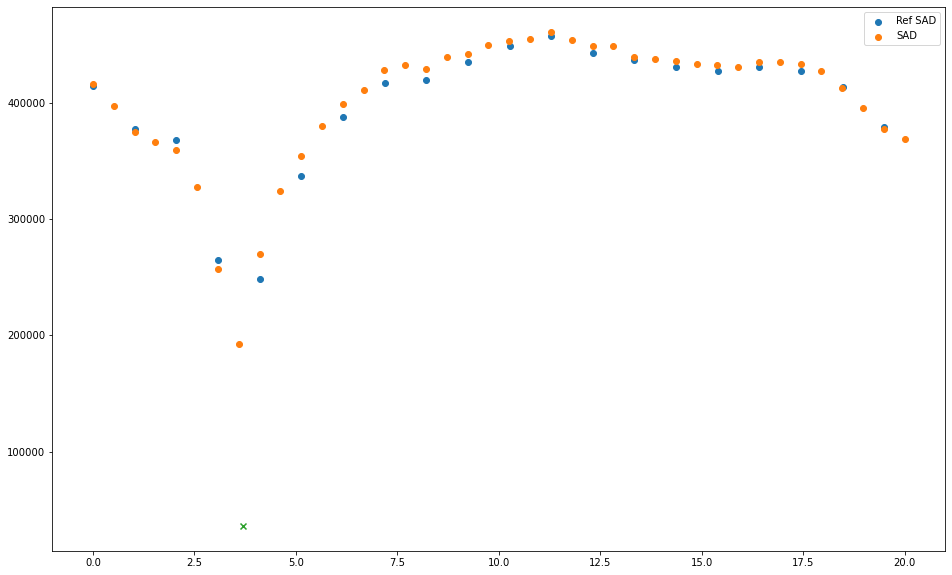

In [164]:
minima = np.argmin(ref_sads[7][0::2])
y_1 = ref_sads[7][0::2][minima - 1]
y_2 = ref_sads[7][0::2][minima]
y_3 = ref_sads[7][0::2][minima + 1]

x,y = v_fitting_standard(y_1, y_2, y_3)

plt.figure(figsize = (16,10))
plt.scatter(np.linspace(0, ref_sads[7][0::2].shape[0] - 0.5, ref_sads[7][0::2].shape[0]), ref_sads[7][0::2], label = "Ref SAD")
plt.scatter(np.linspace(0, ref_sads[7][0::2].shape[0], og.sads[86].shape[0]), og.sads[86], label = "SAD")
plt.scatter(np.linspace(0, ref_sads[7][0::2].shape[0] - 0.5, ref_sads[7][0::2].shape[0])[minima] + x, ref_sads[7][0::2][minima] - y, marker = "x")
plt.legend()
plt.show()

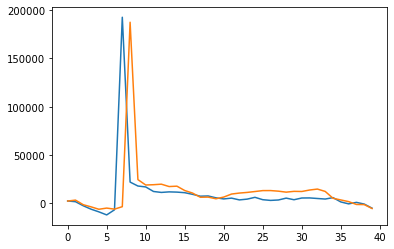

In [54]:
plt.plot(og.sads[86] - ref_sads[7])
plt.plot(og.sads[87] - ref_sads[8])

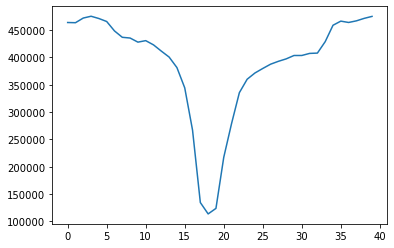

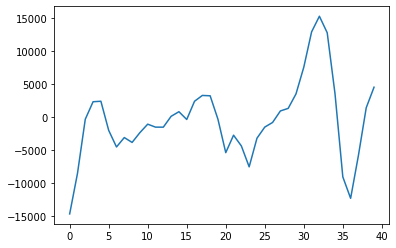

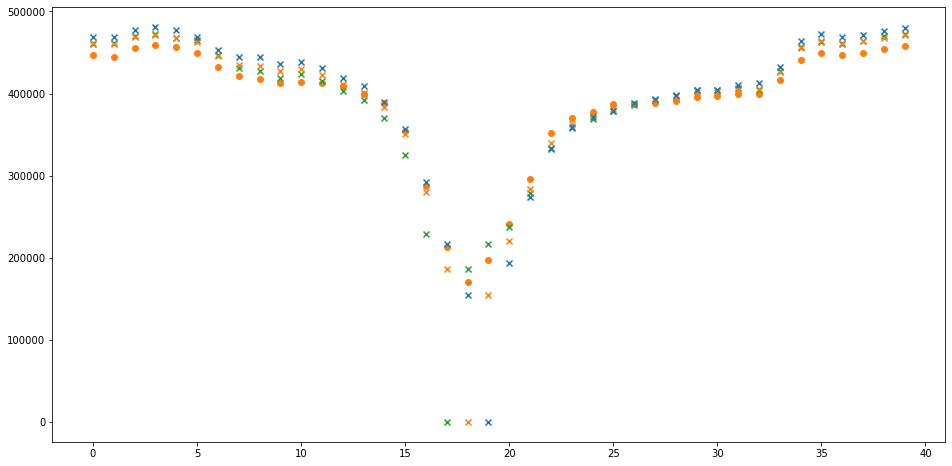

In [97]:
plt.plot()

plt.plot(np.gradient(np.mean(ref_sads, axis = 0)))
plt.show()

plt.figure(figsize = (16,8))
plt.scatter(range(og.sads[97].shape[0]), og.sads[97], c = "tab:orange")
plt.scatter(range(ref_sads[7].shape[0]), ref_sads[17], c = "tab:green", marker = "x")
plt.scatter(range(ref_sads[7].shape[0]), ref_sads[18], c = "tab:orange", marker = "x")
plt.scatter(range(ref_sads[7].shape[0]), ref_sads[19], c = "tab:blue", marker = "x")
plt.show()